In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

import random
from grid import *
from utils import *
from floor import *
import cv2 as cv
import os

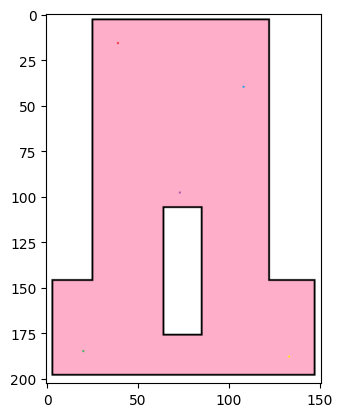

In [2]:
floorplans = []
data_dir = "data/pre_defined/"
for filename in os.listdir(data_dir):
    if filename.lower().endswith(('.png', 'jpeg')):
        filepath = os.path.join(data_dir, filename)
        floorplan = cv.imread(filepath)
        floorplan = cv.cvtColor(floorplan, cv.COLOR_BGR2RGB)
        plt.imshow(floorplan)
        floorplans.append(floorplan)

In [ ]:
# Example 1: Simple 5x5 room with outer walls and open interior
grid_simple = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 17, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# Example 2: 7x7 grid with cross-shaped inner walls
grid_cross = [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 17, 18, 17, 1, 0],
    [0, 1, 18, 18, 18, 1, 0],
    [0, 1, 17, 18, 17, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
]

# Example 3: 9x9 grid with maze-like structure
grid_maze = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 17, 18, 17, 18, 17, 1, 0],
    [0, 1, 18, 18, 18, 18, 18, 1, 0],
    [0, 1, 17, 18, 17, 18, 17, 1, 0],
    [0, 1, 18, 18, 18, 18, 18, 1, 0],
    [0, 1, 17, 18, 17, 18, 17, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

# Example 4: 7x7 grid with central chamber
grid_central = [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 17, 17, 17, 1, 0],
    [0, 1, 17, 18, 17, 1, 0],
    [0, 1, 17, 18, 17, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
]

# Example 5: 11x11 grid with complex layout
grid_complex = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 17, 17, 17, 18, 17, 17, 17, 1, 0],
    [0, 1, 17, 18, 18, 18, 18, 18, 17, 1, 0],
    [0, 1, 17, 18, 17, 17, 17, 18, 17, 1, 0],
    [0, 1, 18, 18, 17, 18, 17, 18, 18, 1, 0],
    [0, 1, 17, 18, 17, 17, 17, 18, 17, 1, 0],
    [0, 1, 17, 18, 18, 18, 18, 18, 17, 1, 0],
    [0, 1, 17, 17, 17, 18, 17, 17, 17, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

grid_empty = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 17, 17, 17, 18, 17, 17, 17, 1, 0],
    [0, 1, 17, 17, 17, 17, 17, 17, 17, 1, 0],
    [0, 1, 17, 17, 17, 17, 17, 17, 17, 1, 0],
    [0, 1, 17, 17, 17, 17, 17, 17, 17, 1, 0],
    [0, 1, 17, 17, 17, 17, 17, 17, 17, 1, 0],
    [0, 1, 17, 17, 17, 17, 17, 17, 17, 1, 0],
    [0, 1, 17, 17, 17, 17, 17, 17, 17, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

In [4]:
def plot_rect(size, rect):
    fig, axes = plt.subplots(size[1], size[0], figsize=size, gridspec_kw={'wspace': 0, 'hspace': 0})
    
    for ax, row in zip(axes.flatten(), rect.flatten()):
        ax.imshow(row.ins, aspect='auto', cmap = 'gray')
        ax.axis('off')


    plt.tight_layout()
    plt.show()


In [5]:
converted_simple = Wall.convert_to_3x3(grid_simple)
converted_simple = np.array(converted_simple)
for row in converted_simple:
    print(' '.join(map(str, row)))
#plot_rect(size=(len(converted_simple[0]), len(converted_simple)), rect=converted_simple)


# Test other examples similarly
converted_cross = Wall.convert_to_3x3(grid_cross)
converted_cross = np.array(converted_cross)
for row in converted_cross:
    print(' '.join(map(str, row)))
#plot_rect(size=(len(converted_cross[0]), len(converted_cross)), rect=converted_cross)


converted_maze = Wall.convert_to_3x3(grid_maze)
converted_maze = np.array(converted_maze)
for row in converted_maze:
    print(' '.join(map(str, row)))
#plot_rect(size=(len(converted_maze[0]), len(converted_maze)), rect=converted_maze)


converted_central = Wall.convert_to_3x3(grid_central)
converted_central = np.array(converted_central)
for row in converted_central:
    print(' '.join(map(str, row)))
#plot_rect(size=(len(converted_central[0]), len(converted_central)), rect=converted_central)


converted_complex = Wall.convert_to_3x3(grid_complex)
converted_complex = np.array(converted_complex)
for row in converted_complex:
    print(' '.join(map(str, row)))
#plot_rect(size=(len(converted_complex[0]), len(converted_complex)), rect=converted_complex)



EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]])
EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) DOWNRIGHT(6, [[0, 0, 0], [0, 1, 1], [0, 1, 0]]) HORIZ(10, [[0, 0, 0], [1, 1, 1], [0, 0, 0]]) DOWNLEFT(12, [[0, 0, 0], [1, 1, 0], [0, 1, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]])
EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) VERT(5, [[0, 1, 0], [0, 1, 0], [0, 1, 0]]) INSIDE(17, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) VERT(5, [[0, 1, 0], [0, 1, 0], [0, 1, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]])
EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) UPRIGHT(3, [[0, 1, 0], [0, 1, 1], [0, 0, 0]]) HORIZ(10, [[0, 0, 0], [1, 1, 1], [0, 0, 0]]) UPLEFT(9, [[0, 1, 0], [1, 1, 0], [0, 0, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]])
EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) EMPTY(0, [[0, 0, 0], [0, 0, 0], [0, 0, 0]]) EMPTY(0, [[0, 0, 0]

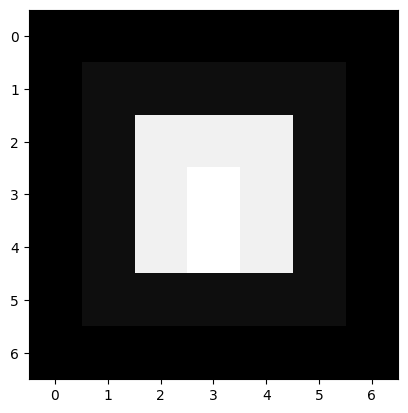

In [6]:
grid_complex = np.array(grid_central)

plt.imshow(grid_central, cmap='gray')

Horizontal segments (row → {start: end}):
  row 1: {1: 4}
  row 5: {1: 4}

Vertical segments (col → {start: end}):
  col 1: {1: 4}
  col 3: {3: 4}
  col 5: {1: 4}


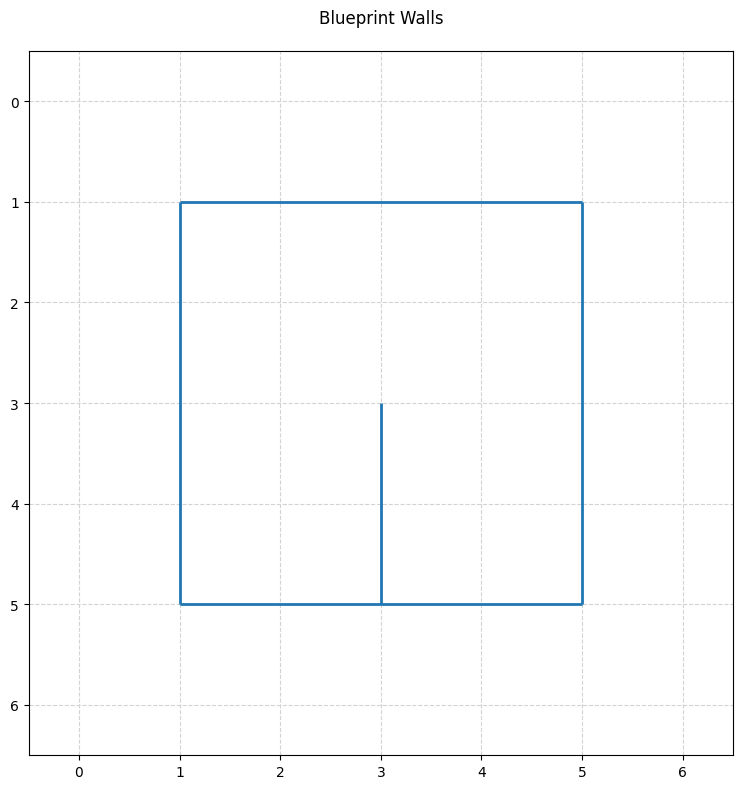

In [7]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

grid_central = [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 17, 17, 17, 1, 0],
    [0, 1, 17, 18, 17, 1, 0],
    [0, 1, 17, 18, 17, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
]

def extract_wall_segments(grid):
    """
    Scan a 2D grid and return wall segments for blueprint plotting.
    Handles values 1 and 18 as wall tiles.
    """
    grid = np.asarray(grid)
    rows, cols = grid.shape

    horiz = defaultdict(dict)
    vert = defaultdict(dict)

    for r in range(rows):
        start = None
        for c in range(cols - 1):
            if grid[r, c] == 1 and grid[r, c + 1] == 1:
                if start is None:
                    start = c  # Start of a new segment
            else:
                if start is not None:
                    end = c - 1 # End the current segment at previous c
                    horiz[r][start] = end
                    start = None
        if start is not None:
            end = cols - 2  # Last possible c is cols-2
            horiz[r][start] = end

    for c in range(cols):
        start = None
        for r in range(rows - 1):
            if grid[r, c] == 1 and grid[r + 1, c] == 1:
                if start is None:
                    start = r  # Start of a new segment
            else:
                if start is not None:
                    # End the current segment at previous r
                    end = r - 1
                    vert[c][start] = end
                    start = None
        if start is not None:
            end = rows - 2  # Last possible r is rows-2
            vert[c][start] = end

    return horiz, vert

converted_simple = np.array([[1 if x in {1, 18} else 0 for x in row] for row in grid_central])
horiz, vert = extract_wall_segments(converted_simple)

# Print results
print("Horizontal segments (row → {start: end}):")
for row, segs in sorted(horiz.items()):
    print(f"  row {row}: {dict(segs)}")
print("\nVertical segments (col → {start: end}):")
for col, segs in sorted(vert.items()):
    print(f"  col {col}: {dict(segs)}")

def plot_blueprint_walls(horiz, vert, rows, cols, line_color='#1f77b4', line_width=2):
    """Improved plotting function with better grid handling"""
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.invert_yaxis()
    
    # Set limits with padding
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(rows - 0.5, -0.5)
    
    # Draw horizontal walls
    for row, segments in horiz.items():
        for start, end in segments.items():
            ax.plot([start, end + 1], [row, row], 
                    color=line_color, 
                    linewidth=line_width,
                    solid_capstyle='butt')
    
    # Draw vertical walls
    for col, segments in vert.items():
        for start, end in segments.items():
            ax.plot([col, col], [start, end + 1], 
                    color=line_color, 
                    linewidth=line_width,
                    solid_capstyle='butt')
    
    # Add grid lines
    ax.set_xticks(np.arange(cols))
    ax.set_yticks(np.arange(rows))
    ax.grid(True, color='lightgray', linestyle='--')
    
    plt.title("Blueprint Walls", pad=20)
    plt.tight_layout()
    plt.show()

# Plot using actual grid dimensions
plot_blueprint_walls(horiz, vert, *converted_simple.shape)